In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2011 = pd.read_csv('clean_players_2011.csv')

In [3]:
df_2011

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,201985,AJ Price,1610612754,IND,25.0,44,27,17,0.614,...,422,440,362,341,155,350,203,14,5,"201985,1610612754"
1,1,201189,Aaron Gray,1610612761,TOR,27.0,49,17,32,0.347,...,283,53,343,342,401,281,125,14,5,"201189,1610612761"
2,2,1733,Al Harrington,1610612743,DEN,32.0,64,36,28,0.563,...,56,29,115,66,81,89,54,14,5,"1733,1610612743"
3,3,201143,Al Horford,1610612737,ATL,26.0,11,7,4,0.636,...,97,215,94,99,22,66,125,14,5,"201143,1610612737"
4,4,2744,Al Jefferson,1610612762,UTA,27.0,61,32,29,0.525,...,25,61,103,21,76,10,7,14,5,"2744,1610612762"
5,5,202329,Al-Farouq Aminu,1610612740,NOH,21.0,66,21,45,0.318,...,121,178,198,255,246,228,125,14,5,"202329,1610612740"
6,6,101187,Alan Anderson,1610612761,TOR,29.0,17,7,10,0.412,...,215,179,151,163,307,254,203,14,5,"101187,1610612761"
7,7,202692,Alec Burks,1610612762,UTA,20.0,59,33,26,0.559,...,119,316,173,224,238,299,203,14,5,"202692,1610612762"
8,8,202087,Alonzo Gee,1610612739,CLE,25.0,63,20,43,0.317,...,37,89,112,138,412,127,125,14,5,"202087,1610612739"
9,9,2405,Amar'e Stoudemire,1610612752,NYK,29.0,47,22,25,0.468,...,7,17,30,33,272,44,28,14,5,"2405,1610612752"


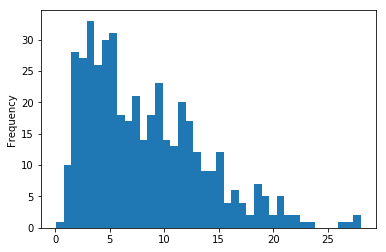

In [4]:
df_2011['PTS'].plot.hist(bins=40)

In [5]:
df_2011.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [7]:
z,pval = stats.normaltest(df_2011['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2011['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2011['PTS'])
stat, kpval = kstest(df_2011['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2011['PTS'])
stat, kpval = kstest(df_2011['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

54.0946411522 1.79265998121e-12
PTS Is not from a Normal Dist
0.0449085283348 0.318622794268
PTS Is likley from a Gamma Dist
0.0648449433609 0.0441861184811
PTS Is not from a Log norm Dist


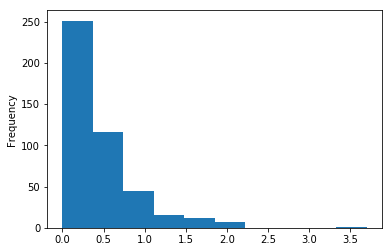

In [8]:
df_2011['BLK'].plot.hist(bins=10)

In [10]:
z,pval = stats.normaltest(df_2011['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2011['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2011['BLK'])
stat, kpval = kstest(df_2011['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2011['BLK'])
stat, kpval = kstest(df_2011['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2011['BLK'])
stat, kpval = kstest(df_2011['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2011['BLK'])
stat, kpval = kstest(df_2011['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


218.254815833 4.04174507294e-48
BLK Is not from a Normal Dist
0.104910711246 9.53490660596e-05
BLK Is not from a Exponen Dist
0.210893230492 0.0
BLK Is not from a Gamma Dist
0.0909439964392 0.00112692864923
BLK Is not from a Log norm Dist
0.167254773887 2.01119121357e-11
BLK Is not from a Chisq Dist


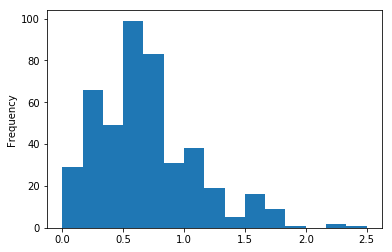

In [11]:
df_2011['STL'].plot.hist(bins=15)

In [12]:
z,pval = stats.normaltest(df_2011['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2011['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2011['STL'])
stat, kpval = kstest(df_2011['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2011['STL'])
stat, kpval = kstest(df_2011['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2011['STL'])
stat, kpval = kstest(df_2011['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

74.163256382 7.86418092972e-17
STL Is not from a Normal Dist
0.0633103739548 0.0527668199495
STL Is likley from a Gamma Dist
0.24664845395 0.0
STL Is not from a Exponen Dist
0.0613445339309 0.0658273159479
STL Is likley from a Log norm Dist


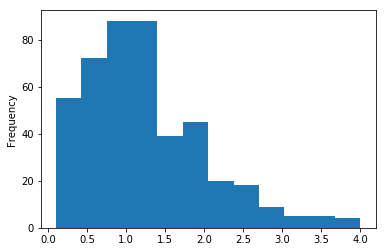

In [13]:
df_2011['TOV'].plot.hist(bins=12)

In [14]:
z,pval = stats.normaltest(df_2011['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2011['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2011['TOV'])
stat, kpval = kstest(df_2011['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2011['TOV'])
stat, kpval = kstest(df_2011['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

65.6813011454 5.46369784872e-15
TOV Is not from a Normal Dist
0.0548977522964 0.129473647243
TOV Is likley from a Gamma Dist
0.0543774335795 0.136293717576
TOV Is likley from a Log norm Dist


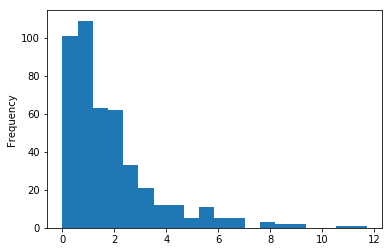

In [15]:
df_2011['AST'].plot.hist(bins=20)

In [16]:
z,pval = stats.normaltest(df_2011['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2011['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2011['AST'])
stat, kpval = kstest(df_2011['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2011['AST'])
stat, kpval = kstest(df_2011['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

198.564240856 7.62645911551e-44
AST Is not from a Normal Dist
0.0615815560854 0.0641189109155
AST Is likley from a Gamma Dist
0.0591066791048 0.0839583451479
AST Is likley from a Log norm Dist


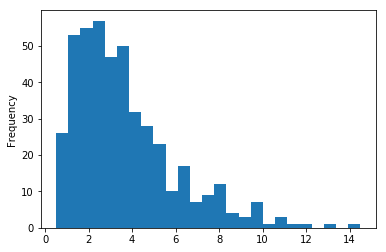

In [17]:
df_2011['REB'].plot.hist(bins=25)

In [18]:
z,pval = stats.normaltest(df_2011['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2011['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2011['REB'])
stat, kpval = kstest(df_2011['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2011['REB'])
stat, kpval = kstest(df_2011['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

109.189800076 1.94866046139e-24
REB Is not from a Normal Dist
0.0360589874368 0.609157522835
REB Is likley from a Gamma Dist
0.0369092183959 0.575889904864
REB Is likley from a Log norm Dist
